<center><h1>VC02: K-means++</h1></center>

En esta práctica estudiaremos el funcionamiento y la utilización del algoritmo de inicialización avanzada de K-means conocido como K-means++.

Para empezar, cargamos las librerías que vamos a necesitar:

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Cargamos el dataset con el que vamos a trabajar:


El dataset cargado tiene 1999 instancias.


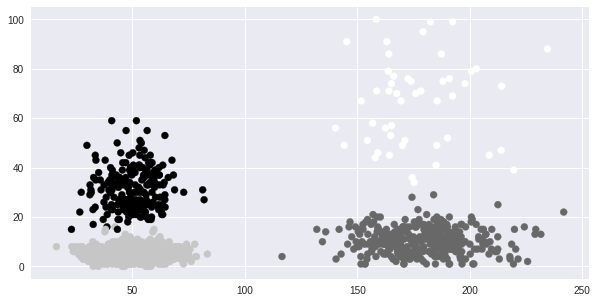

In [21]:
np.random.seed(31) # Fijamos una semilla para asegurar la reproducibilidad de la práctica

data_file_url = 'https://raw.githubusercontent.com/jhernandezgonzalez/unsupervisedlearning/master/datasets/sinteticos/dataset_cuatro_diferente_densidad.csv'
D = np.array(pd.read_csv(data_file_url,header=0))
D = D[ np.random.choice(np.arange(D.shape[0]), D.shape[0], replace=False) ,:]
Dx = D[:,0:2]
Dy = D[:,2]
print('El dataset cargado tiene',Dy.size,'instancias.')

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)


El algoritmo K-means tiene un único parámetro: el número de clústeres (K). Una vez fijado este valor, el primer paso consiste en elegir unos centros iniciales.


In [0]:
# Elegimos un número de clústeres a buscar
K = 4

def min_distancia_euclidiana_grupo(x, C):
    return np.min(np.sqrt(np.sum(np.power(C-x,2),axis=1)))

cDx = np.zeros(Dx.shape[1])
cDx.shape = (1,Dx.shape[1])

icenter = np.random.randint(Dx.shape[0])
cDx[0,:] = Dx[icenter,:]
auxDx = np.delete(Dx, icenter, 0)


Una vez elegida aleatoriamente una instancia como primer centro, procedemos a muestrear, iterativamente, un nuevo centro entre el resto del conjunto de datos de manera proporcional a la distancia a los centros ya escogidos: 


Los centros iniciales elegidos aleatoriamente son:
[[ 61.92   4.  ]
 [185.17   4.  ]
 [ 47.32  55.  ]
 [197.87  74.  ]]
EL VALOR A SUBIR AL CAMPUS VIRTUAL ES:  185.17


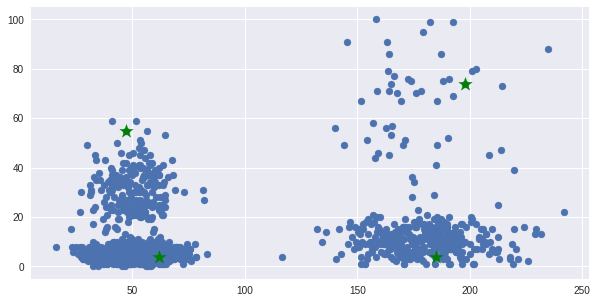

In [23]:
for k in np.arange(K-1):
    dist_min = np.zeros(auxDx.shape[0])
    for i in np.arange(auxDx.shape[0]):
        dist_min[i] = min_distancia_euclidiana_grupo(auxDx[i,:], cDx)
    probs = np.square(dist_min)/np.sum(np.square(dist_min))   #### TU CODIGO AQUI ####
    cumprobs = np.cumsum(probs)
    icenter = np.where(cumprobs >= np.random.random_sample())[0][0]
    cDx= np.append(cDx, np.matrix(auxDx[icenter,:]), axis=0)
    auxDx = np.delete(auxDx, icenter, 0)

print('Los centros iniciales elegidos aleatoriamente son:')
print(cDx)
print('EL VALOR A SUBIR AL CAMPUS VIRTUAL ES: ', cDx[1,0])

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(np.array(cDx[:,0]),np.array(cDx[:,1]), marker='*', s=200, c='g')


Una vez escogidos los centros, el algoritmo K-means continúa como es habitual:


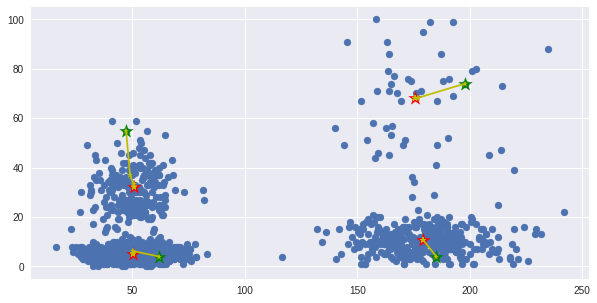

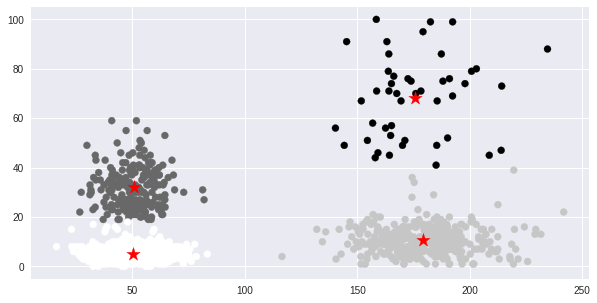

In [24]:
# Definimos la distancia euclidiana de una instancia x 
# con respecto a un grupo de instancias C
def distancia_euclidiana_grupo(x, C):   
    return np.sqrt(np.sum(np.power(C-x,2),axis=1))

# Preparamos el vector donde guardamos la asignación de cada elemento 
# a un clúster (1,...,K)
Dyp = np.zeros(Dx.shape[0])

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(np.array(cDx[:,0]),np.array(cDx[:,1]), marker='*', s=200, c='g')

# Flag de convergencia
iterando = True

while iterando:

    # Vector auxiliar para guardar los centros de la iteración pasada
    # necesarios para identificar la convergencia
    cDx_ant = cDx.copy()

    # Buscamos el centro más cercano a cada instancia y la asignamos a ese clúster
    for i in np.arange(Dx.shape[0]):
        pred_y = np.argmin(distancia_euclidiana_grupo(Dx[i],cDx))   #### TU CODIGO AQUI ####
        Dyp[i] = pred_y

    # Calcular los nuevos centros
    for k in range(K):
        cDx[k,:] = Dx[Dyp==k].mean(axis=0)  #### TU CODIGO AQUI ####

    for k in np.arange(K):
        ax.plot( [cDx_ant[k,0], cDx[k,0]],[cDx_ant[k,1], cDx[k,1]], linestyle='-', marker='*', c='y')
    
    iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)

ax.scatter(np.array(cDx[:,0]),np.array(cDx[:,1]), marker='*', s=200, c='r')

# Ver asignaciones finales
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(np.array(cDx[:,0]),np.array(cDx[:,1]), marker='*', s=200, c='r')



En la implementación de K-means en Scikit-learn, se usa por defecto la inicialización de K-means++.
